In [3]:
from selenium import webdriver
from PIL import Image as pil
import time

In [47]:
url = 'https://www.youtube.com/watch?v=UThGcWBIMpU&t=500s'
driver = webdriver.Chrome()
driver.get(url)
driver.save_screenshot('screenshot.png')

# 여러개의 이미지를 스크린샷
# for idx in range(5):
#     time.sleep(1)
#     driver.save_screenshot('screenshot' + str(idx) + '.png')

driver.quit()


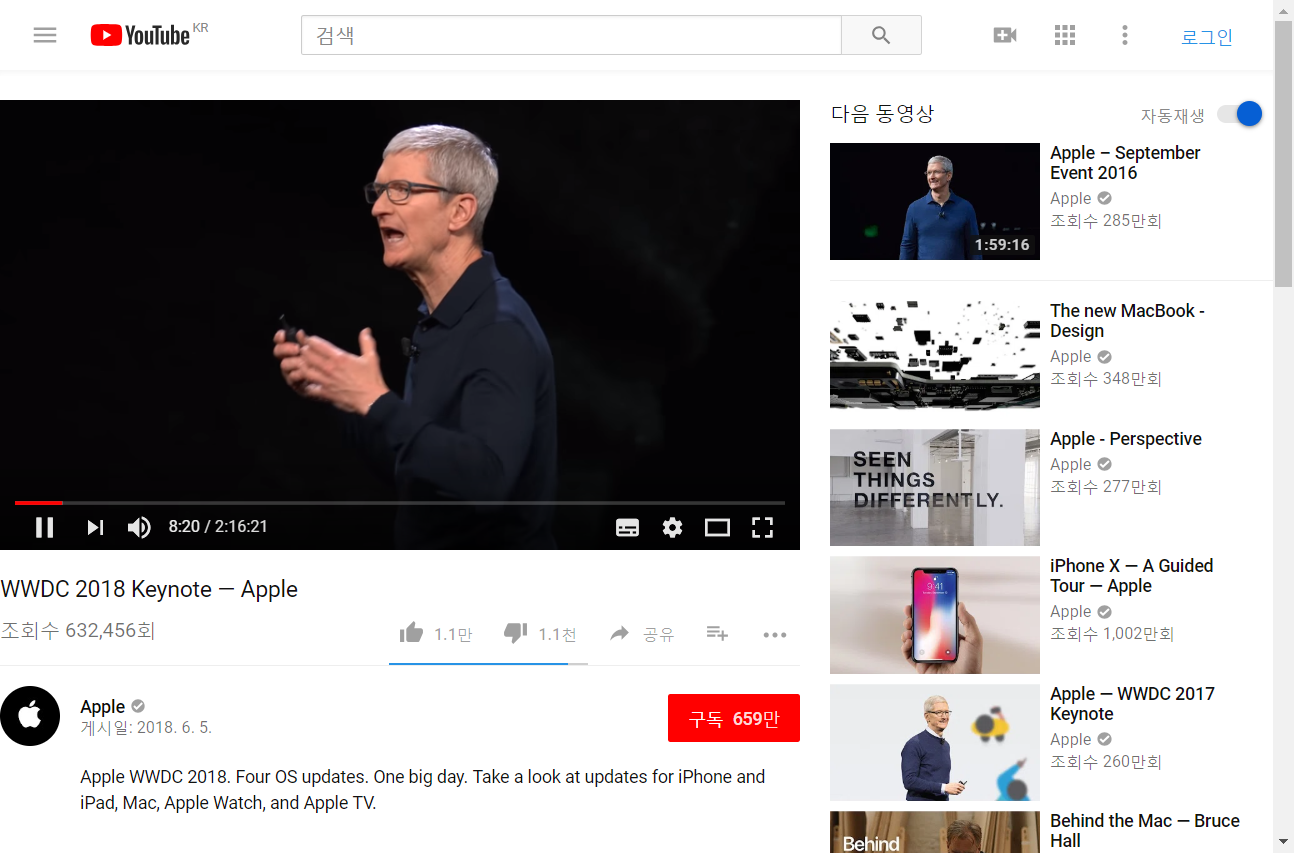

In [62]:
# 이미지 띄우기
pil_im = pil.open('screenshot.png')
pil_im

In [49]:
# id가 player-container인 엘리먼트 영역의 위치값을 구하기
url = 'https://www.youtube.com/watch?v=UThGcWBIMpU&t=500s'
driver = webdriver.Chrome()
driver.get(url)

In [50]:
element = driver.find_element_by_css_selector('#player-container')
location = element.location
size = element.size
location, size

({'x': 0, 'y': 80}, {'height': 360, 'width': 640})

In [51]:
driver.quit()

In [112]:
# top, bottom, left, right 
# 레티나 디스플레이의 경우 *2를 해줘야 합니다.
left = location['x']
top = location['y'] * 1.22
right = left + size['width'] * 1.253
bottom = top + size['height'] * 1.255

area = (left, top, right, bottom)
area

(0, 97.6, 801.92, 549.4)

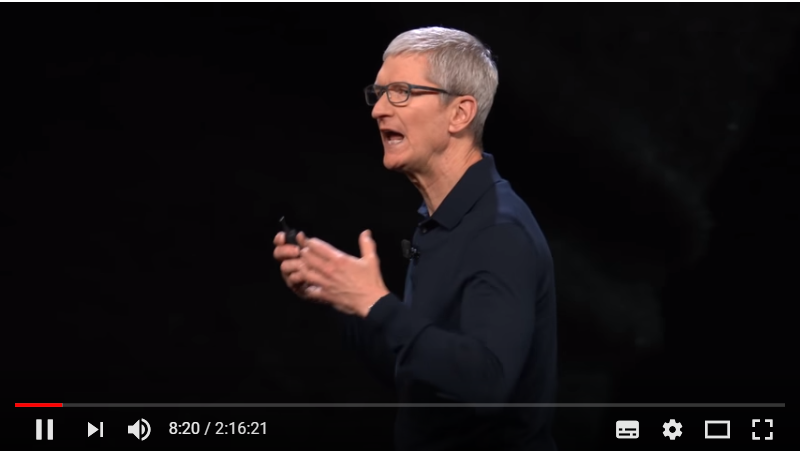

In [113]:
pil_im = pil.open('screenshot.png')
pil_im = pil_im.crop(area)
pil_im

In [23]:
pil_im.save('screenshot_element.png')

In [36]:
# 하단의 재생 기능 영역 자르기
driver = webdriver.Chrome()
driver.get(url)

In [40]:
element = driver.find_element_by_css_selector('.ytp-chrome-bottom')
location = element.location
size = element.size
location, size

({'x': 12, 'y': 401}, {'height': 39, 'width': 616})

In [58]:
left = location['x']
top = location['y']
right = left + size['width']
bottom = top + size['height'] - 39
area = (left, top, right, bottom)
area

(0, 80, 640, 401)

In [60]:
pil_im = pil.open('screenshot.png')
pil_im = pil_im.crop(area)
pil_im.save('screenshot_element2.png')

In [114]:
# 썸네일 만들기
pil_im.size

(802, 451)

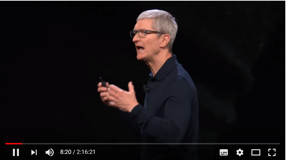

In [116]:
# 원하는 사이즈로 튜플로 넣기
pil_im.thumbnail((320, 160))
pil_im

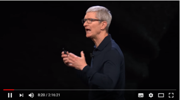

In [122]:
pil_im.thumbnail((200,100))
pil_im

In [125]:
pil_im.thumbnail((250,100))
pil_im.save('thumbnail1.png')

In [131]:
# Thumb Nail Vision API
url = 'https://cloud.google.com/vision/'
driver = webdriver.Chrome()
driver.get(url)
iframe = driver.find_element_by_css_selector('#vision_demo_section > iframe')
driver.switch_to_frame(iframe)
file_path = 'C:\\Users\\Jongjae\\thumbnail1.png'
driver.find_element_by_css_selector('#input').send_keys(file_path)


In [133]:
driver.find_element_by_css_selector('#webDetection').click()
results = driver.find_elements_by_css_selector('#card .container > .row')[:15]
for result in results:
    print(
    result.find_element_by_css_selector('.name').text,
    result.find_element_by_css_selector('.score').text,
        
    )

Motivational speaker 0.82399
Speech 0.66156
Song 0.65686
Video 0.65266
Phenomenon 0.5391
Orator 0.5242
Motivation 0.4914
